#                                  Telecom Churn Case Study
>>>>>- Adarsh Vittal Shetty
>>>>>- Sanjaya Kumar Sahu

#### Problem Statement :
- In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- We need to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
data = pd.read_csv('telecom_churn_data.csv',sep=',', encoding='ISO-8859-1')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.shape

(99999, 226)

In [5]:
print(type(data['mobile_number'][0]))
print(len(data.mobile_number.unique()))

<class 'numpy.int64'>
99999


- All the row entries are unique, there are no duplicate entries

In [6]:
#Method to display column with missing Data ,columns with missing percent greater than "minPercentMissing" will be displayed
def showMissingData(df,minPercentMissing):
    x = pd.DataFrame(100*(round(df.isnull().sum()/len(df.index),2)))
    return x[x[0]>minPercentMissing]

In [7]:
# Show % of data missing in columns data, with missing values greater than 0
y = showMissingData(data,0)
y

,0
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
last_date_of_month_7,1.0
last_date_of_month_8,1.0
last_date_of_month_9,2.0
onnet_mou_6,4.0
onnet_mou_7,4.0
onnet_mou_8,5.0
onnet_mou_9,8.0


In [8]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [11]:
#Filtered all the columns for 6,7,8,9 months
fiteredColumns = [col for tag in ['6','7','8','9'] for col in data.columns if tag in col]
fiteredColumns

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 

In [12]:
#Let us check other columns other than 6,7,8,9 months
otherColumns = [col for col in data.columns if col not in fiteredColumns]
otherColumns

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g']

In [13]:
# column names [ 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'] will be changed back to original naming convention of _6,_7,_8,_9
data.rename(columns = {'aug_vbc_3g':'vbc_3g_8', 
                       'jul_vbc_3g':'vbc_3g_7', 
                       'jun_vbc_3g':'vbc_3g_6',
                       'sep_vbc_3g':'vbc_3g_9'}, inplace = True) 
data.columns.values


array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [14]:
#let us check the values of the data which has more than 10%of the data missing
y = showMissingData(data,10)
y

,0
date_of_last_rech_data_6,75.0
date_of_last_rech_data_7,74.0
date_of_last_rech_data_8,74.0
date_of_last_rech_data_9,74.0
total_rech_data_6,75.0
total_rech_data_7,74.0
total_rech_data_8,74.0
total_rech_data_9,74.0
max_rech_data_6,75.0
max_rech_data_7,74.0


### We can clearly see a pattern here for 6,7,8,9 months 
### 75% missing value for 6th month,74 percent missing values for 7,8,9 months


In [15]:
y.index.values

array(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'], dtype=object)

## let us impute values only for recharge amount data of the first 2 months ('good phase') and filter the High value customers and check for some pattern to impute other values.


#### high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [16]:
# imputing 0 for the recharge amount data of the 1st 2 months
cols = ['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6', 'av_rech_amt_data_7']
data[cols] = data[cols].fillna(0,axis=1)


In [17]:
HVC_Data=data[data[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6', 'av_rech_amt_data_7']].mean(axis=1)> data[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [18]:
HVC_Data.shape

(29949, 226)

### from 99999 rows ,we ended up with 29949 rows of data, 
- These are High Value customer

In [19]:
#let us check the values of the data which has more than 10%of the data missing
y = showMissingData(HVC_Data,10)
y

,0
date_of_last_rech_data_6,50.0
date_of_last_rech_data_7,49.0
date_of_last_rech_data_8,52.0
date_of_last_rech_data_9,53.0
total_rech_data_6,50.0
total_rech_data_7,49.0
total_rech_data_8,52.0
total_rech_data_9,53.0
max_rech_data_6,50.0
max_rech_data_7,49.0


#### After filtering the data for High value customers, we still see a pattern for 6,7,8,9 months....which is 50,49,52,53
#### Let us impute these values with 0,except date columns


In [20]:
y.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [21]:
# imputing 0 for the recharge amount data of the 1st 2 months
cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9']
HVC_Data[cols] = HVC_Data[cols].fillna(0,axis=1)

In [22]:
#let us check the values of the data 
y = showMissingData(HVC_Data,0)
y

,0
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
last_date_of_month_8,1.0
last_date_of_month_9,1.0
onnet_mou_6,2.0
onnet_mou_7,2.0
onnet_mou_8,4.0
onnet_mou_9,6.0
offnet_mou_6,2.0


In [23]:
y.index.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t

#### Tag churners and remove attributes of the churn phase
##### attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9



In [24]:
checkPointData = HVC_Data.loc[:,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

print(checkPointData.head())
#let us check the values of the data 
y = showMissingData(checkPointData,0)
print(y)

    total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00          0.0          0.0
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
16          334.56          255.74          0.0          0.0
21          252.61         1031.53          0.0          0.0
Empty DataFrame
Columns: [0]
Index: []


##### we dont have any missing data in the columns ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'] which are used to tag the churners

Let us tag the churners

In [25]:
HVC_Data['churn'] = HVC_Data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x : 1 if ((x['total_ic_mou_9'] == 0) & (x['total_og_mou_9'] == 0) & (x['vol_2g_mb_9'] == 0) & (x['vol_3g_mb_9'] == 0) ) else 0,axis=1)

In [26]:
HVC_Data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0


## Since , we are done tagging the churners , let us delete all the columns for the month of September(9th month)

In [27]:
#Filtered all the columns for 6,7,8,9 months
fiteredColumns_9 = [col for col in HVC_Data.columns if '9' in col]
fiteredColumns_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [28]:
HVC_Data = HVC_Data.drop(fiteredColumns_9,axis=1)

In [29]:
HVC_Data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0


In [30]:
y = showMissingData(HVC_Data,0)
y

,0
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
last_date_of_month_8,1.0
onnet_mou_6,2.0
onnet_mou_7,2.0
onnet_mou_8,4.0
offnet_mou_6,2.0
offnet_mou_7,2.0
offnet_mou_8,4.0


In [31]:
HVC_Data_numeric = HVC_Data.select_dtypes(include =['float64','int64']) 
HVC_Data_numeric.columns.values
HVC_Data_numeric.index

Int64Index([    0,     7,     8,    16,    21,    33,    38,    41,    48,
               53,
            ...
            99963, 99965, 99970, 99974, 99981, 99984, 99986, 99988, 99997,
            99998],
           dtype='int64', length=29949)

In [32]:
HVC_Data_numeric_temp = pd.DataFrame(HVC_Data['mobile_number'])

HVC_Data_numeric_temp['index1'] = HVC_Data_numeric_temp.index
HVC_Data_numeric_temp

,mobile_number,index1
0,7000842753,0
7,7000701601,7
8,7001524846,8
16,7000875565,16
21,7002124215,21
33,7000149764,33
38,7000815202,38
41,7000721289,41
48,7000294396,48
53,7002188521,53


In [33]:
#Let us use Iterative Imputer to impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='median')
imp.fit(HVC_Data_numeric)
imputed_data = pd.DataFrame(data=imp.transform(HVC_Data_numeric), 
                             columns=HVC_Data_numeric.columns,
                             dtype='float64')

In [34]:
imputed_data = HVC_Data_numeric_temp.merge(imputed_data, how='outer',on='mobile_number')

imputed_data.head()

,mobile_number,index1,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,0,109.0,0.0,0.0,0.0,197.385,214.816,213.803,135.156305,...,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,7000701601,7,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
2,7001524846,8,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,...,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
3,7000875565,16,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.510000,...,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0
4,7002124215,21,109.0,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,...,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0


In [35]:
imputed_data.set_index('index1', inplace=True)
imputed_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
index1,,,,,,,,,,,,,,,,,,,,,
0,7000842753,109.0,0.0,0.0,0.0,197.385,214.816,213.803,135.156305,142.090269,...,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
7,7000701601,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
8,7001524846,109.0,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,...,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
16,7000875565,109.0,0.0,0.0,0.0,430.975,299.869,187.894,50.510000,74.010000,...,0.0,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0
21,7002124215,109.0,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,132.110000,...,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0


In [36]:
imputed_data.shape

(29949, 163)

In [37]:
HVC_Data_object = HVC_Data.select_dtypes(include ='object') 

HVC_Data_object.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'], dtype=object)

In [38]:
100*(round(HVC_Data_object.isnull().sum()/len(HVC_Data_object.index),2))

last_date_of_month_6         0.0
last_date_of_month_7         0.0
last_date_of_month_8         1.0
date_of_last_rech_6          0.0
date_of_last_rech_7          0.0
date_of_last_rech_8          2.0
date_of_last_rech_data_6    50.0
date_of_last_rech_data_7    49.0
date_of_last_rech_data_8    52.0
dtype: float64

In [41]:
HVC_Data_final = imputed_data.join(HVC_Data_object, how='outer')

y = showMissingData(HVC_Data_final,0)
y

,0
last_date_of_month_8,1.0
date_of_last_rech_8,2.0
date_of_last_rech_data_6,50.0
date_of_last_rech_data_7,49.0
date_of_last_rech_data_8,52.0


In [42]:
HVC_Data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 172 entries, mobile_number to date_of_last_rech_data_8
dtypes: float64(162), int64(1), object(9)
memory usage: 40.8+ MB


In [43]:
HVC_Data_object.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'], dtype=object)

In [44]:
# we have seen the pattern of date_of_last_rech_data_6	50.0, date_of_last_rech_data_7	49.0, date_of_last_rech_data_8	52.0 earlier,
# We can assume that , missing data is when people did not recharge inthat month
# We will use this information to derive a new categorical variables if the user recharged or not in that month.
# tag as '0' for no recharge, '1' if there is recharge'
datCols = ['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']
# converting to date format as isnull wont work on object type
HVC_Data_final[datCols]=HVC_Data_final[datCols].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
#HVC_Data_final[datCols]
HVC_Data_final['recharge_6'] = HVC_Data_final['date_of_last_rech_6'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_7'] = HVC_Data_final['date_of_last_rech_7'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_8'] = HVC_Data_final['date_of_last_rech_8'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_data_6'] = HVC_Data_final['date_of_last_rech_data_6'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_data_7'] = HVC_Data_final['date_of_last_rech_data_7'].apply(lambda x : 0 if pd.isnull(x) else 1 )
HVC_Data_final['recharge_data_8'] = HVC_Data_final['date_of_last_rech_data_8'].apply(lambda x : 0 if pd.isnull(x) else 1 )
#Convert the features to category
HVC_Data_final[['recharge_6','recharge_7','recharge_8','recharge_data_6','recharge_data_7','recharge_data_8','churn' ]] = HVC_Data_final[['recharge_6','recharge_7','recharge_8','recharge_data_6','recharge_data_7','recharge_data_8','churn' ]].apply(lambda x: x.astype('category'))

#verify tagging
HVC_Data_final[['date_of_last_rech_data_6','recharge_data_6','date_of_last_rech_data_7','recharge_data_7','date_of_last_rech_data_8','recharge_data_8','date_of_last_rech_6','recharge_6','date_of_last_rech_7','recharge_7','date_of_last_rech_8','recharge_8']].head()




,date_of_last_rech_data_6,recharge_data_6,date_of_last_rech_data_7,recharge_data_7,date_of_last_rech_data_8,recharge_data_8,date_of_last_rech_6,recharge_6,date_of_last_rech_7,recharge_7,date_of_last_rech_8,recharge_8
index1,,,,,,,,,,,,
0,2014-06-21,1,2014-07-16,1,2014-08-08,1,2014-06-21,1,2014-07-16,1,2014-08-08,1
7,NaT,0,NaT,0,NaT,0,2014-06-27,1,2014-07-25,1,2014-08-26,1
8,NaT,0,2014-07-31,1,2014-08-23,1,2014-06-25,1,2014-07-31,1,2014-08-30,1
16,NaT,0,NaT,0,NaT,0,2014-06-30,1,2014-07-31,1,2014-08-14,1
21,NaT,0,NaT,0,NaT,0,2014-06-30,1,2014-07-31,1,2014-08-31,1


## Data Visualization and Exploratory Data Analysis

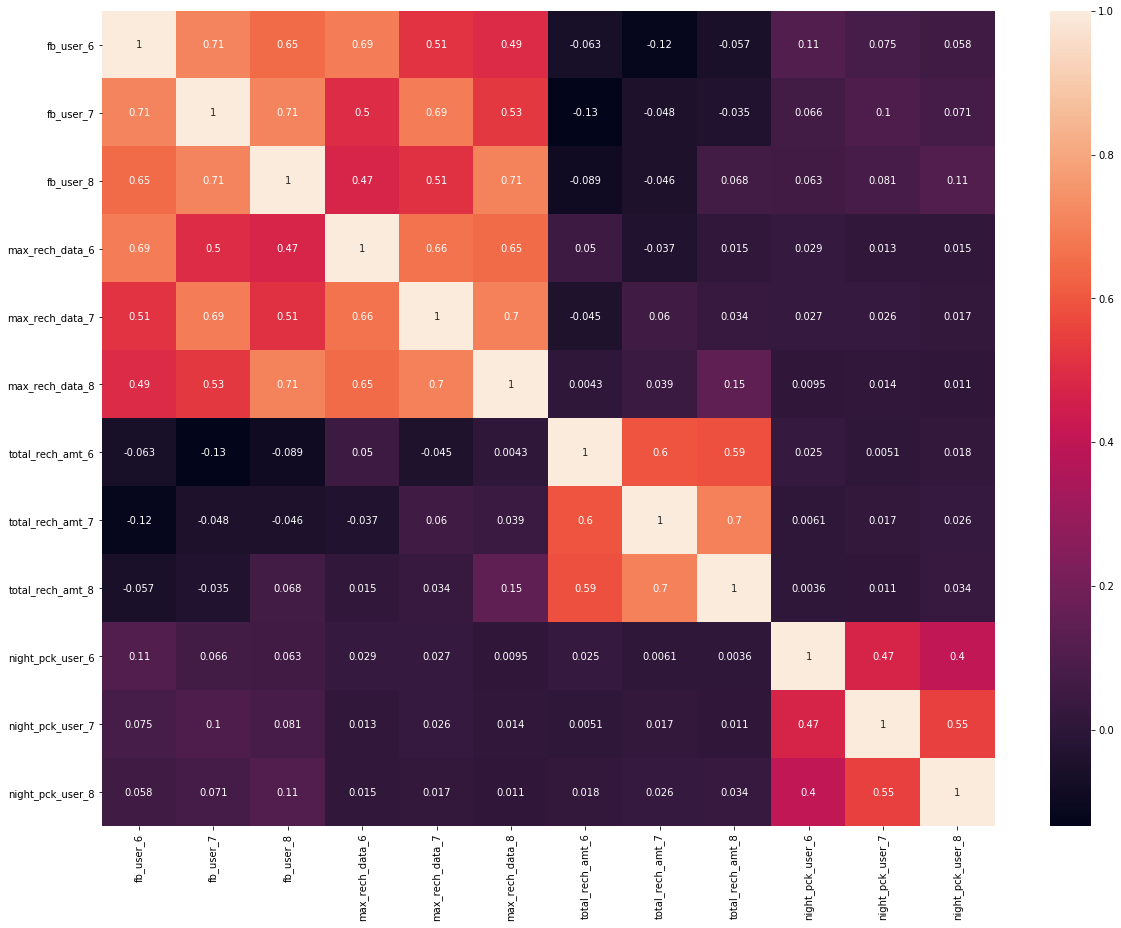

In [45]:
data = HVC_Data_final[['fb_user_6','fb_user_7', 'fb_user_8','max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8',  'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8','night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8']]
plt.figure(figsize = (20,15)) 
sns.heatmap(data.corr(),annot = True)
plt.show()

#### Observations
- no surprises,FB users usually recharge data packs
- night pack users are usually not data users

In [46]:
# These functions are required to create the plot for univariate or bivariate analysis
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariatePlot(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid data, expected numeric variable or a categorical vairable.")
        
def bivariatePlot(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    29949.000000
mean       577.006877
std        449.261901
min      -2258.709000
25%        345.808000
50%        490.933000
75%        702.776000
max      27731.088000
Name: arpu_6, dtype: float64


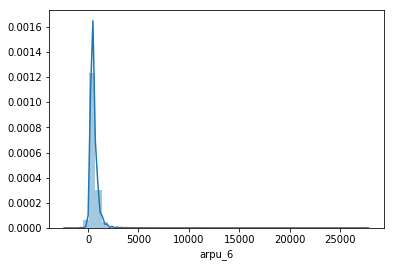

In [47]:
univariatePlot(HVC_Data_final.arpu_6)

#### Observations:
- arpu is quite less, which indicates that most are prepaid users

count    29949.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


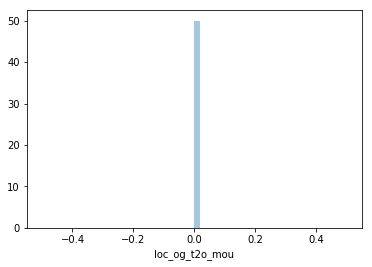

In [48]:
univariatePlot(HVC_Data_final.loc_og_t2o_mou)

#### Observations:
- people dont use loc_og_t2o_mou

count    29949.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


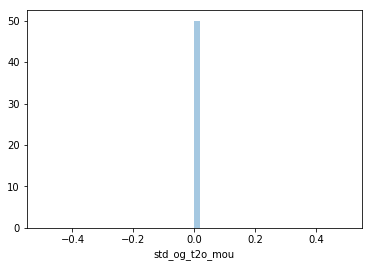

In [49]:
univariatePlot(HVC_Data_final.std_og_t2o_mou)

#### Observations:
- People dont use std_og_t2o_mou

count    29949.000000
mean       248.606242
std        463.935528
min       -460.205476
25%         18.040000
50%         81.060000
75%        267.910000
max      10752.560000
Name: onnet_mou_8, dtype: float64


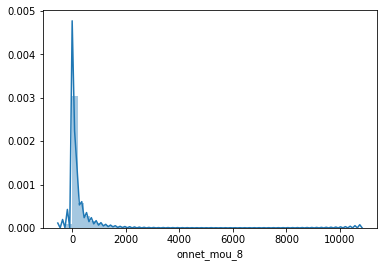

In [50]:
univariatePlot(HVC_Data_final.onnet_mou_8)


## Plot the Percentage of Churn and Non churn customer 

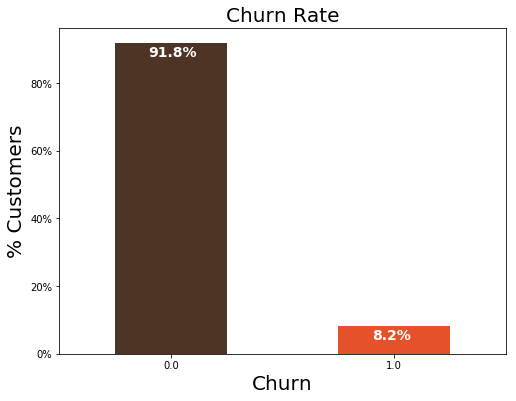

In [51]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

colors = ['#4D3425','#E4512B']
ax = (HVC_Data_final['churn'].value_counts()*100.0 /len(HVC_Data_final)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 20)
ax.set_xlabel('Churn',size = 20)
ax.set_title('Churn Rate', size = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)


#### Observation: 
- 91.8 % of the customers have not churned.
- The data set has class imbalance, need to be taken care while building the model

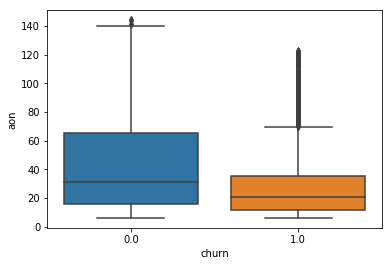

In [52]:
#Convert the number of days to number of months for easy visualisation of data.
HVC_Data_final['aon']=HVC_Data_final['aon'].div(30)

sns.boxplot(x = HVC_Data_final.churn, y = HVC_Data_final.aon)

#### Observation: 
- More number of customers stay for longer duration in the network.
- People who churn are relatively newer customers

Text(0.5, 1.0, '# of Customers by their tenure')

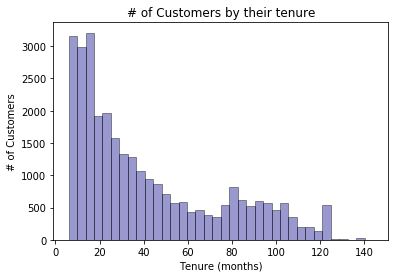

In [53]:
ax = sns.distplot(HVC_Data_final['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

#### Observations:
- Majority of the customers have used for very less number of months
- Many customers initially joined the network,after that did not use the connection or moved to different network.

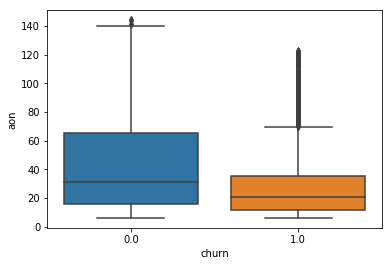

In [54]:
bivariatePlot(HVC_Data_final.churn, HVC_Data_final.aon)

#### Observation:
- people who have stayed on the network for longer time have less churn rate

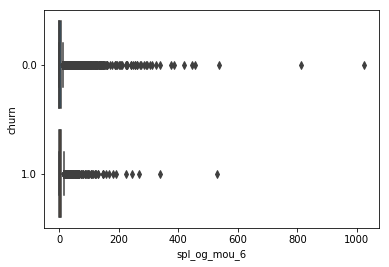

In [55]:
bivariatePlot(HVC_Data_final.spl_og_mou_6, HVC_Data_final.churn)

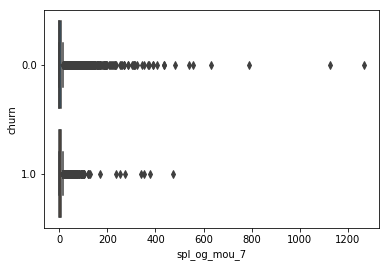

In [56]:
bivariatePlot(HVC_Data_final.spl_og_mou_7, HVC_Data_final.churn)

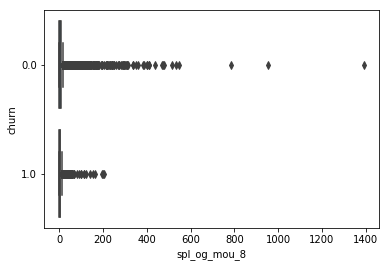

In [57]:
bivariatePlot(HVC_Data_final.spl_og_mou_8, HVC_Data_final.churn)

In [59]:
#Let us delete the date columns

In [58]:
HVC_DF = HVC_Data_final

HVC_DF = HVC_DF.drop(datCols, axis =1)
HVC_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 169 entries, mobile_number to recharge_data_8
dtypes: category(7), float64(161), int64(1)
memory usage: 38.7 MB


In [60]:
HVC_DF.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.994900e+04,29949.0,29949.0,29949.0,29949.0,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,...,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,7.001216e+09,109.0,0.0,0.0,0.0,577.006877,578.921924,525.105455,279.617358,286.828081,...,0.180240,0.195032,0.175565,0.456977,0.462152,0.424555,41.478265,164.539175,173.749613,153.984264
std,6.867758e+05,0.0,0.0,0.0,0.0,449.261901,469.335744,496.373165,460.534956,482.056790,...,0.940799,1.043847,1.037672,0.498154,0.498574,0.494284,32.365297,419.712551,444.482427,416.280454
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,109.0,0.0,0.0,0.0,345.808000,347.071000,266.252000,29.730000,28.640000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.633333,0.000000,0.000000,0.000000
50%,7.001221e+09,109.0,0.0,0.0,0.0,490.933000,489.043000,443.470000,110.430000,108.260000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.466667,0.000000,0.000000,0.000000
75%,7.001806e+09,109.0,0.0,0.0,0.0,702.776000,700.512000,666.980000,321.810000,322.760000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,62.133333,104.960000,109.700000,75.270000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,29.000000,35.000000,41.000000,1.000000,1.000000,1.000000,144.033333,12916.220000,9165.600000,11166.210000


In [61]:
#columns loc_og_t2o_mou , std_og_t2o_mou and loc_ic_t2o_mou are giving much information
#let us drop these columns
HVC_DF = HVC_DF.drop(['loc_og_t2o_mou', 'std_og_t2o_mou' ,'loc_ic_t2o_mou','circle_id'], axis =1)
HVC_DF.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.994900e+04,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,...,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,7.001216e+09,577.006877,578.921924,525.105455,279.617358,286.828081,248.606242,395.164782,403.021144,365.639905,...,0.180240,0.195032,0.175565,0.456977,0.462152,0.424555,41.478265,164.539175,173.749613,153.984264
std,6.867758e+05,449.261901,469.335744,496.373165,460.534956,482.056790,463.935528,478.323823,493.371587,476.199909,...,0.940799,1.043847,1.037672,0.498154,0.498574,0.494284,32.365297,419.712551,444.482427,416.280454
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,-460.205476,-36.422062,-172.678441,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,7.000631e+09,345.808000,347.071000,266.252000,29.730000,28.640000,18.040000,100.440000,103.840000,83.510000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.633333,0.000000,0.000000,0.000000
50%,7.001221e+09,490.933000,489.043000,443.470000,110.430000,108.260000,81.060000,251.860000,251.390000,234.440000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.466667,0.000000,0.000000,0.000000
75%,7.001806e+09,702.776000,700.512000,666.980000,321.810000,322.760000,267.910000,508.130000,514.640000,459.710000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,62.133333,104.960000,109.700000,75.270000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,29.000000,35.000000,41.000000,1.000000,1.000000,1.000000,144.033333,12916.220000,9165.600000,11166.210000


In [62]:
showMissingData(HVC_DF,0)

,0


In [63]:
#Let us clear the outliers in the dataframe
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#IQR Range finders
def return_IQR_L(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    return fence_low

def return_IQR_H(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_high = q3+1.5*iqr
    return fence_high


In [64]:
# get numeric values
HVC_Data_numeric_temp = HVC_DF.select_dtypes(include =['float64','int64']) 

HVC_DF_IQR = pd.DataFrame(columns=['col','IQR_L','IQR_H','min','max'])

for col in HVC_Data_numeric_temp.columns:
    L = return_IQR_L(HVC_DF,col)
    H = return_IQR_H(HVC_DF,col)
    lst = [col,L,H,HVC_DF[col].min(),HVC_DF[col].max()]
    df = pd.DataFrame([lst], columns=['col','IQR_L','IQR_H','min','max'])
    HVC_DF_IQR = HVC_DF_IQR.append(df,ignore_index=True)
HVC_DF_IQR

,col,IQR_L,IQR_H,min,max
0,mobile_number,6.998869e+09,7.003568e+09,7000000074,7002410905
1,arpu_6,-1.896440e+02,1.238228e+03,-2258.71,27731.1
2,arpu_7,-1.830905e+02,1.230673e+03,-2014.05,35145.8
3,arpu_8,-3.348400e+02,1.268072e+03,-945.808,33543.6
4,onnet_mou_6,-4.083900e+02,7.599300e+02,0,7376.71
5,onnet_mou_7,-4.125400e+02,7.639400e+02,0,8157.78
6,onnet_mou_8,-3.567650e+02,6.427150e+02,-460.205,10752.6
7,offnet_mou_6,-5.110950e+02,1.119665e+03,-36.4221,8362.36
8,offnet_mou_7,-5.123600e+02,1.130840e+03,-172.678,9667.13
9,offnet_mou_8,-4.807900e+02,1.024010e+03,0,14007.3


In [65]:
#Let us filter the columns which has outliers
cols_with_outliers = []
for i in range(0,len(HVC_DF_IQR.index)): 
    if((HVC_DF_IQR.loc[i,'max'] > 1) & (HVC_DF_IQR.loc[i,'IQR_H'] < HVC_DF_IQR.loc[i,'max']) & (HVC_DF_IQR.loc[i,'min'] < HVC_DF_IQR.loc[i,'IQR_L'])):
        cols_with_outliers.append(HVC_DF_IQR.loc[i,'col']) 
cols_with_outliers

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_8',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'arpu_3g_8',
 'arpu_2g_8']

In [67]:
#Checkpoint for Data
print(showMissingData(HVC_DF,0))
HVC_DF_1 = HVC_DF

Empty DataFrame
Columns: [0]
Index: []


In [127]:
HVC_DF = HVC_DF_1

In [128]:
for col in cols_with_outliers:
    HVC_DF_FINAL = remove_outlier(HVC_DF, col)

In [129]:
HVC_DF_FINAL.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,2.351100e+04,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,...,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000
mean,7.001213e+09,572.302637,568.074159,489.243397,310.726329,318.639990,272.434169,428.194985,435.781400,387.982188,...,0.084343,0.076858,0.019906,0.351367,0.345923,0.268215,40.814305,84.970862,101.665093,91.878393
std,6.914885e+05,439.343685,462.744000,483.678106,482.098340,503.827222,484.045796,499.147783,518.598157,497.039668,...,0.544793,0.476237,0.165595,0.477408,0.475678,0.443040,31.936730,269.827107,309.547138,296.306996
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,-460.205476,-35.552659,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,7.000616e+09,353.834500,353.003000,249.518500,36.610000,35.790000,21.472626,118.350000,119.135000,91.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.733333,0.000000,0.000000,0.000000
50%,7.001214e+09,493.343000,487.526000,422.386000,128.390000,128.390000,94.210000,280.830000,280.440000,249.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.966667,0.000000,0.000000,0.000000
75%,7.001811e+09,696.621000,684.059500,629.819500,374.890000,380.905000,307.540000,551.365000,561.770000,489.955000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,59.783333,0.000000,0.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,7741.530000,10752.560000,8362.360000,9667.130000,14007.340000,...,28.000000,19.000000,8.000000,1.000000,1.000000,1.000000,141.166667,6686.880000,5703.530000,7581.250000


In [130]:
HVC_DF.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7

In [131]:
showMissingData(HVC_DF_FINAL,0)

,0


#### Before building the Models, let us combine few columns and get new columns
- Let us combine columns for 6,7 month as it is 'good' phase
- rename month 8 as 'action'

In [132]:
#Filtered all the columns for 6,7,8 months
fiteredColumns_678 = [col for tag in ['6','7','8'] for col in HVC_DF_FINAL.columns if tag in col]
fiteredColumns_678.remove('recharge_6')
fiteredColumns_678.remove('recharge_data_6')
fiteredColumns_678.remove('recharge_7')
fiteredColumns_678.remove('recharge_data_7')
fiteredColumns_678.remove('recharge_8')
fiteredColumns_678.remove('recharge_data_8')
len(fiteredColumns_678)

156

In [133]:
lst=[]

#Get the column afterremoving two characters
for col in fiteredColumns_678:
    lst.append(col[:-2])
lst

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_t2c_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_t2o_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_

In [134]:
# get unique columns
uniqueCols=[]
uniqueCols=set(lst)
uniqueCols = list(uniqueCols)
len(uniqueCols)

52

In [135]:
for col in uniqueCols:
    HVC_DF_FINAL[col+'_good'] = HVC_DF_FINAL[col+'_6'] + HVC_DF_FINAL[col+'_7']
    HVC_DF_FINAL[col+'_action'] = HVC_DF_FINAL[col+'_8']
HVC_DF_FINAL.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,loc_og_t2c_mou_good,loc_og_t2c_mou_action,std_ic_t2m_mou_good,std_ic_t2m_mou_action,isd_ic_mou_good,isd_ic_mou_action,monthly_2g_good,monthly_2g_action,arpu_3g_good,arpu_3g_action
index1,,,,,,,,,,,,,,,,,,,,,
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.0,0.00,218.43,141.33,16.59,31.59,0.0,0.0,0.0,0.00
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0.0,7.15,26.51,0.65,0.00,0.00,1.0,0.0,0.0,19.83
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0.0,0.00,91.76,73.93,0.00,0.23,0.0,0.0,0.0,0.00
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0.0,0.00,105.92,101.74,0.00,0.00,0.0,0.0,0.0,0.00
38,7000815202,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,...,0.0,0.00,20.52,13.41,19.08,1.20,0.0,0.0,0.0,0.00


In [136]:
HVC_DF_FINAL = HVC_DF_FINAL.drop(fiteredColumns_678, axis = 1)

In [137]:
HVC_DF_FINAL.head()

,mobile_number,aon,churn,recharge_6,recharge_7,recharge_8,recharge_data_6,recharge_data_7,recharge_data_8,roam_og_mou_good,...,loc_og_t2c_mou_good,loc_og_t2c_mou_action,std_ic_t2m_mou_good,std_ic_t2m_mou_action,isd_ic_mou_good,isd_ic_mou_action,monthly_2g_good,monthly_2g_action,arpu_3g_good,arpu_3g_action
index1,,,,,,,,,,,,,,,,,,,,,
7,7000701601,26.733333,1.0,1,1,1,0,0,0,36.33,...,0.0,0.00,218.43,141.33,16.59,31.59,0.0,0.0,0.0,0.00
8,7001524846,10.500000,0.0,1,1,1,0,1,1,0.00,...,0.0,7.15,26.51,0.65,0.00,0.00,1.0,0.0,0.0,19.83
16,7000875565,17.033333,0.0,1,1,1,0,0,0,17.74,...,0.0,0.00,91.76,73.93,0.00,0.23,0.0,0.0,0.0,0.00
21,7002124215,24.000000,0.0,1,1,1,0,0,0,0.00,...,0.0,0.00,105.92,101.74,0.00,0.00,0.0,0.0,0.0,0.00
38,7000815202,38.500000,0.0,1,1,1,0,0,0,0.00,...,0.0,0.00,20.52,13.41,19.08,1.20,0.0,0.0,0.0,0.00


In [138]:
HVC_DF_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23511 entries, 7 to 99998
Columns: 113 entries, mobile_number to arpu_3g_action
dtypes: category(7), float64(105), int64(1)
memory usage: 19.4 MB


In [139]:
HVC_DF_FINAL.columns.values

array(['mobile_number', 'aon', 'churn', 'recharge_6', 'recharge_7',
       'recharge_8', 'recharge_data_6', 'recharge_data_7',
       'recharge_data_8', 'roam_og_mou_good', 'roam_og_mou_action',
       'loc_ic_t2t_mou_good', 'loc_ic_t2t_mou_action',
       'count_rech_3g_good', 'count_rech_3g_action', 'roam_ic_mou_good',
       'roam_ic_mou_action', 'loc_ic_t2f_mou_good',
       'loc_ic_t2f_mou_action', 'std_ic_t2t_mou_good',
       'std_ic_t2t_mou_action', 'loc_og_t2f_mou_good',
       'loc_og_t2f_mou_action', 'loc_og_t2t_mou_good',
       'loc_og_t2t_mou_action', 'vbc_3g_good', 'vbc_3g_action',
       'vol_3g_mb_good', 'vol_3g_mb_action', 'total_rech_amt_good',
       'total_rech_amt_action', 'last_day_rch_amt_good',
       'last_day_rch_amt_action', 'count_rech_2g_good',
       'count_rech_2g_action', 'av_rech_amt_data_good',
       'av_rech_amt_data_action', 'vol_2g_mb_good', 'vol_2g_mb_action',
       'fb_user_good', 'fb_user_action', 'std_og_t2c_mou_good',
       'std_og_t2c_mou_

## Model 1 : Logistic Regression with RFE

In [140]:
# Putting feature variable to X
X = HVC_DF_FINAL.drop(['churn','mobile_number'], axis=1)

X.head()


,aon,recharge_6,recharge_7,recharge_8,recharge_data_6,recharge_data_7,recharge_data_8,roam_og_mou_good,roam_og_mou_action,loc_ic_t2t_mou_good,...,loc_og_t2c_mou_good,loc_og_t2c_mou_action,std_ic_t2m_mou_good,std_ic_t2m_mou_action,isd_ic_mou_good,isd_ic_mou_action,monthly_2g_good,monthly_2g_action,arpu_3g_good,arpu_3g_action
index1,,,,,,,,,,,,,,,,,,,,,
7,26.733333,1,1,1,0,0,0,36.33,38.06,90.40,...,0.0,0.00,218.43,141.33,16.59,31.59,0.0,0.0,0.0,0.00
8,10.500000,1,1,1,0,1,1,0.00,0.00,33.68,...,0.0,7.15,26.51,0.65,0.00,0.00,1.0,0.0,0.0,19.83
16,17.033333,1,1,1,0,0,0,17.74,0.00,112.77,...,0.0,0.00,91.76,73.93,0.00,0.23,0.0,0.0,0.0,0.00
21,24.000000,1,1,1,0,0,0,0.00,0.00,12.67,...,0.0,0.00,105.92,101.74,0.00,0.00,0.0,0.0,0.0,0.00
38,38.500000,1,1,1,0,0,0,0.00,0.00,20.47,...,0.0,0.00,20.52,13.41,19.08,1.20,0.0,0.0,0.0,0.00


In [141]:
# Putting response variable to y
y = HVC_DF_FINAL['churn']

y.head()

index1
7     1.0
8     0.0
16    0.0
21    0.0
38    0.0
Name: churn, dtype: category
Categories (2, float64): [0.0, 1.0]

In [142]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 93413 to 23787
Columns: 111 entries, aon to arpu_3g_action
dtypes: category(6), float64(105)
memory usage: 13.4 MB


### Feature Scaling

In [144]:
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.head()

,aon,recharge_6,recharge_7,recharge_8,recharge_data_6,recharge_data_7,recharge_data_8,roam_og_mou_good,roam_og_mou_action,loc_ic_t2t_mou_good,...,loc_og_t2c_mou_good,loc_og_t2c_mou_action,std_ic_t2m_mou_good,std_ic_t2m_mou_action,isd_ic_mou_good,isd_ic_mou_action,monthly_2g_good,monthly_2g_action,arpu_3g_good,arpu_3g_action
index1,,,,,,,,,,,,,,,,,,,,,
93413,-0.915781,0.043443,0.061991,0.157428,1.225800,1.232188,1.388254,-0.270122,-0.198937,-0.293371,...,-0.291970,-0.218884,-0.306282,-0.239037,-0.096767,0.133285,-0.456761,1.967061,3.493711,-0.154442
62525,-1.024606,0.043443,0.061991,0.157428,-0.815794,-0.811565,-0.720329,-0.270122,-0.198937,0.197567,...,-0.291970,-0.218884,-0.314462,-0.319867,-0.186308,-0.162672,-0.456761,-0.396543,-0.312332,-0.155472
55435,-0.677205,0.043443,0.061991,0.157428,-0.815794,1.232188,1.388254,1.837310,0.816964,-0.441612,...,-0.291970,-0.102203,-0.328633,-0.200312,-0.186308,-0.213677,0.818373,1.967061,0.092596,-0.155472
99579,-0.191680,0.043443,0.061991,0.157428,1.225800,1.232188,1.388254,0.549229,-0.198937,-0.101854,...,-0.185394,1.056227,-0.289975,-0.319867,-0.186308,-0.162672,2.093506,1.967061,-0.312648,-0.155129
36509,-0.543267,0.043443,0.061991,0.157428,1.225800,1.232188,-0.720329,-0.204739,-0.198937,-0.379061,...,-0.291970,-0.218884,-0.133206,-0.225873,-0.186308,-0.162672,-0.456761,-0.396543,-0.008572,-0.155472


In [145]:
### Checking the Churn Rate
churn = (sum(HVC_DF_FINAL['churn'])/len(HVC_DF_FINAL['churn'].index))*100
churn

9.820934881544808

#### We need to handle class imbalance as only 9.8% of the data is churn data 

In [146]:
# Let us use class_weight='balanced_subsample' to handle class imbalance in our data
logreg = LogisticRegression(class_weight='balanced_subsample')

In [147]:

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [148]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False])

In [149]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('aon', False, 15),
 ('recharge_6', False, 62),
 ('recharge_7', False, 53),
 ('recharge_8', False, 65),
 ('recharge_data_6', False, 44),
 ('recharge_data_7', False, 71),
 ('recharge_data_8', False, 31),
 ('roam_og_mou_good', False, 66),
 ('roam_og_mou_action', False, 57),
 ('loc_ic_t2t_mou_good', False, 21),
 ('loc_ic_t2t_mou_action', True, 1),
 ('count_rech_3g_good', False, 38),
 ('count_rech_3g_action', False, 73),
 ('roam_ic_mou_good', False, 42),
 ('roam_ic_mou_action', False, 87),
 ('loc_ic_t2f_mou_good', False, 50),
 ('loc_ic_t2f_mou_action', False, 83),
 ('std_ic_t2t_mou_good', False, 48),
 ('std_ic_t2t_mou_action', False, 39),
 ('loc_og_t2f_mou_good', False, 77),
 ('loc_og_t2f_mou_action', False, 82),
 ('loc_og_t2t_mou_good', False, 16),
 ('loc_og_t2t_mou_action', False, 91),
 ('vbc_3g_good', False, 36),
 ('vbc_3g_action', False, 45),
 ('vol_3g_mb_good', False, 43),
 ('vol_3g_mb_action', False, 32),
 ('total_rech_amt_good', False, 52),
 ('total_rech_amt_action', True, 1),
 ('l

In [150]:
col = X_train.columns[rfe.support_]

In [151]:
X_train.columns[~rfe.support_]

Index(['aon', 'recharge_6', 'recharge_7', 'recharge_8', 'recharge_data_6',
       'recharge_data_7', 'recharge_data_8', 'roam_og_mou_good',
       'roam_og_mou_action', 'loc_ic_t2t_mou_good', 'count_rech_3g_good',
       'count_rech_3g_action', 'roam_ic_mou_good', 'roam_ic_mou_action',
       'loc_ic_t2f_mou_good', 'loc_ic_t2f_mou_action', 'std_ic_t2t_mou_good',
       'std_ic_t2t_mou_action', 'loc_og_t2f_mou_good', 'loc_og_t2f_mou_action',
       'loc_og_t2t_mou_good', 'loc_og_t2t_mou_action', 'vbc_3g_good',
       'vbc_3g_action', 'vol_3g_mb_good', 'vol_3g_mb_action',
       'total_rech_amt_good', 'last_day_rch_amt_good',
       'last_day_rch_amt_action', 'count_rech_2g_good', 'count_rech_2g_action',
       'av_rech_amt_data_good', 'vol_2g_mb_good', 'vol_2g_mb_action',
       'fb_user_good', 'fb_user_action', 'std_og_t2c_mou_good',
       'std_og_t2c_mou_action', 'ic_others_good', 'ic_others_action',
       'std_og_t2t_mou_good', 'loc_ic_mou_good', 'loc_ic_mou_action',
       'sachet

In [152]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16441
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3443.2
Date:                Mon, 24 Feb 2020   Deviance:                       6886.5
Time:                        19:28:40   Pearson chi2:                 4.49e+05
No. Iterations:                     8   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.5105      0.064    -54.520      0.000      -3.637      -3.384
loc_ic_t2t_mou_action       1.8998      0.193      9.857      0.000       1.522       2.278
total_rech_amt_action      -0.8054      0.140     -5.758      0.000      -1.080      -0.531
av_rech_amt_data_action    -0.7893      0.067    -11.758      0.000      -0.921      -0.658
std_og_t2t_mou_action       1.3918      0.175      7.945      0.000       1.048       1.735
std_ic_mou_action           1.4959      0.167      8.951      0.000       1.168       1.823
arpu_action                 0.6728      0.125      5.373      0.000       0.427       0.918
total_ic_mou_action        -4.7551      0.387    -12.300      0.000      -5.513      -3.997
onnet_mou_good              0.9783      0.116      8.443      0.000       0.751       1.205
offnet_mou_good             1.0801      0.117      9.240      0.000       0.851       1.309
loc_ic_t2m_mou_action       1.9831      0.220      9.033      0.000       1.553       2.413
std_og_mou_action          -0.9865      0.216     -4.573      0.000      -1.409      -0.564
std_og_t2m_mou_action       1.2671      0.176      7.202      0.000       0.922       1.612
total_og_mou_good          -0.8147      0.157     -5.193      0.000      -1.122      -0.507
total_og_mou_action        -2.2114      0.194    -11.389      0.000      -2.592      -1.831
isd_ic_mou_action           0.9053      0.098      9.217      0.000       0.713       1.098
===========================================================================================
"""

In [153]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

index1
93413    0.020196
62525    0.047671
55435    0.175027
99579    0.034839
36509    0.038469
44335    0.056612
74820    0.505710
43445    0.004988
74479    0.043899
18499    0.074399
dtype: float64

In [154]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0201955 , 0.04767117, 0.17502729, 0.03483872, 0.03846894,
       0.05661226, 0.50571024, 0.00498789, 0.04389938, 0.07439908])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [155]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0.0,0.020196,93413
1,0.0,0.047671,62525
2,0.0,0.175027,55435
3,0.0,0.034839,99579
4,0.0,0.038469,36509


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [156]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.020196,93413,0
1,0.0,0.047671,62525,0
2,0.0,0.175027,55435,0
3,0.0,0.034839,99579,0
4,0.0,0.038469,36509,0


In [157]:
from sklearn import metrics

In [158]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14632   183]
 [ 1069   573]]


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9239229507200584


In [160]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,std_og_mou_action,97.62
11,std_og_t2m_mou_action,45.42
3,std_og_t2t_mou_action,45.25
12,total_og_mou_good,42.31
6,total_ic_mou_action,37.74
8,offnet_mou_good,22.93
7,onnet_mou_good,22.35
9,loc_ic_t2m_mou_action,15.24
5,arpu_action,11.03
1,total_rech_amt_action,10.52


In [162]:
col = col.drop('std_og_mou_action', 1)
col

Index(['loc_ic_t2t_mou_action', 'total_rech_amt_action',
       'av_rech_amt_data_action', 'std_og_t2t_mou_action', 'std_ic_mou_action',
       'arpu_action', 'total_ic_mou_action', 'onnet_mou_good',
       'offnet_mou_good', 'loc_ic_t2m_mou_action', 'std_og_t2m_mou_action',
       'total_og_mou_good', 'total_og_mou_action', 'isd_ic_mou_action'],
      dtype='object')

In [163]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16442
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3452.1
Date:                Mon, 24 Feb 2020   Deviance:                       6904.2
Time:                        19:29:02   Pearson chi2:                 6.54e+05
No. Iterations:                     8   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.5180      0.065    -54.453      0.000      -3.645      -3.391
loc_ic_t2t_mou_action       1.9470      0.201      9.693      0.000       1.553       2.341
total_rech_amt_action      -0.8079      0.141     -5.749      0.000      -1.083      -0.532
av_rech_amt_data_action    -0.7930      0.067    -11.822      0.000      -0.925      -0.662
std_og_t2t_mou_action       0.8319      0.130      6.381      0.000       0.576       1.087
std_ic_mou_action           1.5213      0.175      8.717      0.000       1.179       1.863
arpu_action                 0.6733      0.126      5.345      0.000       0.426       0.920
total_ic_mou_action        -4.8499      0.408    -11.894      0.000      -5.649      -4.051
onnet_mou_good              0.9678      0.116      8.372      0.000       0.741       1.194
offnet_mou_good             1.0940      0.117      9.376      0.000       0.865       1.323
loc_ic_t2m_mou_action       2.0658      0.231      8.949      0.000       1.613       2.518
std_og_t2m_mou_action       0.6944      0.127      5.464      0.000       0.445       0.943
total_og_mou_good          -0.8529      0.156     -5.458      0.000      -1.159      -0.547
total_og_mou_action        -2.3302      0.201    -11.599      0.000      -2.724      -1.936
isd_ic_mou_action           0.9203      0.102      8.996      0.000       0.720       1.121
===========================================================================================
"""

In [164]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.02098933, 0.04723833, 0.12184028, 0.03484711, 0.03907195,
       0.05501544, 0.50053986, 0.00497166, 0.04495709, 0.07584453])

In [165]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.020989,93413,0
1,0.0,0.047238,62525,0
2,0.0,0.121840,55435,0
3,0.0,0.034847,99579,0
4,0.0,0.039072,36509,0


In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9241660083854895


So overall the accuracy hasn't dropped much.

In [167]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_og_mou_good,42.18
6,total_ic_mou_action,37.67
8,offnet_mou_good,22.91
7,onnet_mou_good,22.35
9,loc_ic_t2m_mou_action,15.22
5,arpu_action,11.02
1,total_rech_amt_action,10.52
0,loc_ic_t2t_mou_action,8.38
12,total_og_mou_action,6.43
4,std_ic_mou_action,6.37


In [168]:
col = col.drop('total_og_mou_good', 1)
col

Index(['loc_ic_t2t_mou_action', 'total_rech_amt_action',
       'av_rech_amt_data_action', 'std_og_t2t_mou_action', 'std_ic_mou_action',
       'arpu_action', 'total_ic_mou_action', 'onnet_mou_good',
       'offnet_mou_good', 'loc_ic_t2m_mou_action', 'std_og_t2m_mou_action',
       'total_og_mou_action', 'isd_ic_mou_action'],
      dtype='object')

In [169]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16443
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3467.2
Date:                Mon, 24 Feb 2020   Deviance:                       6934.4
Time:                        19:29:18   Pearson chi2:                 8.02e+05
No. Iterations:                     8   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.5284      0.065    -54.340      0.000      -3.656      -3.401
loc_ic_t2t_mou_action       2.0045      0.204      9.815      0.000       1.604       2.405
total_rech_amt_action      -0.7269      0.141     -5.143      0.000      -1.004      -0.450
av_rech_amt_data_action    -0.8071      0.067    -12.040      0.000      -0.939      -0.676
std_og_t2t_mou_action       0.8554      0.131      6.520      0.000       0.598       1.113
std_ic_mou_action           1.5880      0.176      9.012      0.000       1.243       1.933
arpu_action                 0.6651      0.125      5.303      0.000       0.419       0.911
total_ic_mou_action        -4.9967      0.414    -12.060      0.000      -5.809      -4.185
onnet_mou_good              0.3730      0.038      9.857      0.000       0.299       0.447
offnet_mou_good             0.4944      0.038     12.936      0.000       0.419       0.569
loc_ic_t2m_mou_action       2.1272      0.234      9.087      0.000       1.668       2.586
std_og_t2m_mou_action       0.7076      0.128      5.539      0.000       0.457       0.958
total_og_mou_action        -2.4286      0.200    -12.169      0.000      -2.820      -2.037
isd_ic_mou_action           0.9348      0.105      8.873      0.000       0.728       1.141
===========================================================================================
"""

In [170]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.02095588, 0.05115508, 0.10400721, 0.03219687, 0.04010904,
       0.05638046, 0.52501521, 0.00478757, 0.0457545 , 0.07834486])

In [171]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.020956,93413,0
1,0.0,0.051155,62525,0
2,0.0,0.104007,55435,0
3,0.0,0.032197,99579,0
4,0.0,0.040109,36509,0


In [172]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9236191286382694


So overall the accuracy hasn't dropped much.

In [173]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_action,37.52
9,loc_ic_t2m_mou_action,15.18
5,arpu_action,11.01
1,total_rech_amt_action,10.51
0,loc_ic_t2t_mou_action,8.35
11,total_og_mou_action,6.35
4,std_ic_mou_action,6.34
10,std_og_t2m_mou_action,3.12
3,std_og_t2t_mou_action,2.98
12,isd_ic_mou_action,2.58


In [174]:
col = col.drop('total_ic_mou_action', 1)
col

Index(['loc_ic_t2t_mou_action', 'total_rech_amt_action',
       'av_rech_amt_data_action', 'std_og_t2t_mou_action', 'std_ic_mou_action',
       'arpu_action', 'onnet_mou_good', 'offnet_mou_good',
       'loc_ic_t2m_mou_action', 'std_og_t2m_mou_action', 'total_og_mou_action',
       'isd_ic_mou_action'],
      dtype='object')

In [175]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16444
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3570.7
Date:                Mon, 24 Feb 2020   Deviance:                       7141.5
Time:                        19:29:29   Pearson chi2:                 1.08e+09
No. Iterations:                     8   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.6732      0.063    -57.881      0.000      -3.798      -3.549
loc_ic_t2t_mou_action       0.0016      0.054      0.030      0.976      -0.104       0.107
total_rech_amt_action      -0.7770      0.151     -5.148      0.000      -1.073      -0.481
av_rech_amt_data_action    -0.8777      0.067    -13.038      0.000      -1.010      -0.746
std_og_t2t_mou_action       2.2116      0.099     22.245      0.000       2.017       2.406
std_ic_mou_action          -0.2210      0.065     -3.408      0.001      -0.348      -0.094
arpu_action                 0.7129      0.134      5.331      0.000       0.451       0.975
onnet_mou_good              0.3497      0.037      9.438      0.000       0.277       0.422
offnet_mou_good             0.5114      0.038     13.467      0.000       0.437       0.586
loc_ic_t2m_mou_action      -0.4169      0.087     -4.777      0.000      -0.588      -0.246
std_og_t2m_mou_action       2.0228      0.095     21.189      0.000       1.836       2.210
total_og_mou_action        -4.6542      0.144    -32.371      0.000      -4.936      -4.372
isd_ic_mou_action          -0.0480      0.056     -0.854      0.393      -0.158       0.062
===========================================================================================
"""

In [176]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.04297666, 0.02960309, 0.09299497, 0.0281507 , 0.04801561,
       0.03776271, 0.55610035, 0.01363113, 0.04723705, 0.09702992])

In [177]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.042977,93413,0
1,0.0,0.029603,62525,0
2,0.0,0.092995,55435,0
3,0.0,0.028151,99579,0
4,0.0,0.048016,36509,0


In [178]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9209454943185271


In [179]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,arpu_action,11.00
1,total_rech_amt_action,10.51
10,total_og_mou_action,6.04
9,std_og_t2m_mou_action,3.01
3,std_og_t2t_mou_action,2.90
6,onnet_mou_good,2.01
7,offnet_mou_good,1.87
8,loc_ic_t2m_mou_action,1.29
0,loc_ic_t2t_mou_action,1.10
2,av_rech_amt_data_action,1.09


In [180]:
col = col.drop('arpu_action', 1)
col

Index(['loc_ic_t2t_mou_action', 'total_rech_amt_action',
       'av_rech_amt_data_action', 'std_og_t2t_mou_action', 'std_ic_mou_action',
       'onnet_mou_good', 'offnet_mou_good', 'loc_ic_t2m_mou_action',
       'std_og_t2m_mou_action', 'total_og_mou_action', 'isd_ic_mou_action'],
      dtype='object')

In [181]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16445
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3584.6
Date:                Mon, 24 Feb 2020   Deviance:                       7169.3
Time:                        19:29:48   Pearson chi2:                 9.46e+08
No. Iterations:                     8   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.6603      0.063    -57.737      0.000      -3.785      -3.536
loc_ic_t2t_mou_action      -0.0028      0.054     -0.051      0.959      -0.109       0.104
total_rech_amt_action      -0.0228      0.056     -0.405      0.686      -0.133       0.088
av_rech_amt_data_action    -0.8933      0.067    -13.246      0.000      -1.025      -0.761
std_og_t2t_mou_action       2.1743      0.099     21.896      0.000       1.980       2.369
std_ic_mou_action          -0.2128      0.064     -3.305      0.001      -0.339      -0.087
onnet_mou_good              0.3435      0.037      9.275      0.000       0.271       0.416
offnet_mou_good             0.5093      0.038     13.447      0.000       0.435       0.584
loc_ic_t2m_mou_action      -0.4347      0.088     -4.957      0.000      -0.607      -0.263
std_og_t2m_mou_action       1.9872      0.095     20.857      0.000       1.800       2.174
total_og_mou_action        -4.6003      0.146    -31.533      0.000      -4.886      -4.314
isd_ic_mou_action          -0.0513      0.058     -0.878      0.380      -0.166       0.063
===========================================================================================
"""

In [182]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.04322382, 0.02419818, 0.0890916 , 0.0258423 , 0.05103126,
       0.03720636, 0.56389468, 0.01246973, 0.04767854, 0.08767032])

In [183]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.043224,93413,0
1,0.0,0.024198,62525,0
2,0.0,0.089092,55435,0
3,0.0,0.025842,99579,0
4,0.0,0.051031,36509,0


In [184]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9210062587348848


In [185]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_og_mou_action,5.94
8,std_og_t2m_mou_action,3.01
3,std_og_t2t_mou_action,2.90
5,onnet_mou_good,2.00
6,offnet_mou_good,1.87
1,total_rech_amt_action,1.49
7,loc_ic_t2m_mou_action,1.29
0,loc_ic_t2t_mou_action,1.10
2,av_rech_amt_data_action,1.09
4,std_ic_mou_action,1.03


In [186]:
col = col.drop('total_og_mou_action', 1)
col

Index(['loc_ic_t2t_mou_action', 'total_rech_amt_action',
       'av_rech_amt_data_action', 'std_og_t2t_mou_action', 'std_ic_mou_action',
       'onnet_mou_good', 'offnet_mou_good', 'loc_ic_t2m_mou_action',
       'std_og_t2m_mou_action', 'isd_ic_mou_action'],
      dtype='object')

In [187]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                16457
Model:                            GLM   Df Residuals:                    16446
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4158.6
Date:                Mon, 24 Feb 2020   Deviance:                       8317.2
Time:                        19:31:09   Pearson chi2:                 5.76e+09
No. Iterations:                     8   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.2601      0.056    -58.703      0.000      -3.369      -3.151
loc_ic_t2t_mou_action      -0.1961      0.072     -2.735      0.006      -0.337      -0.056
total_rech_amt_action      -1.9278      0.086    -22.483      0.000      -2.096      -1.760
av_rech_amt_data_action    -0.8851      0.071    -12.522      0.000      -1.024      -0.747
std_og_t2t_mou_action       0.0647      0.052      1.244      0.214      -0.037       0.167
std_ic_mou_action          -0.1148      0.052     -2.192      0.028      -0.217      -0.012
onnet_mou_good              0.2154      0.032      6.802      0.000       0.153       0.277
offnet_mou_good             0.3382      0.034      9.911      0.000       0.271       0.405
loc_ic_t2m_mou_action      -0.8920      0.083    -10.697      0.000      -1.055      -0.729
std_og_t2m_mou_action       0.0485      0.055      0.885      0.376      -0.059       0.156
isd_ic_mou_action          -0.1126      0.067     -1.676      0.094      -0.244       0.019
===========================================================================================
"""

In [188]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.03432239, 0.04120575, 0.00809188, 0.03822315, 0.05673447,
       0.10184374, 0.56125211, 0.01786616, 0.05361893, 0.09456637])

In [189]:
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0.0,0.034322,93413,0
1,0.0,0.041206,62525,0
2,0.0,0.008092,55435,0
3,0.0,0.038223,99579,0
4,0.0,0.056734,36509,0


In [190]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9004071215895971


In [191]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_t2t_mou_action,1.86
6,offnet_mou_good,1.77
5,onnet_mou_good,1.76
8,std_og_t2m_mou_action,1.73
1,total_rech_amt_action,1.29
7,loc_ic_t2m_mou_action,1.15
2,av_rech_amt_data_action,1.09
0,loc_ic_t2t_mou_action,1.07
4,std_ic_mou_action,1.03
9,isd_ic_mou_action,1.02


## Accuracy over 90% with VIFs of the attributes less than 5

## Let us compute sensitivity(Recall) and check the data as we do not want to wrongly classify churn

In [192]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [193]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3489646772228989

In [194]:
# Let us calculate specificity
TN / float(TN+FP)

0.9876476544043199

In [195]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.012352345595680055


In [196]:
# positive predictive value 
print (TP / float(TP+FP))

0.7579365079365079


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.931915164639195


###  Plotting the ROC Curve

In [198]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

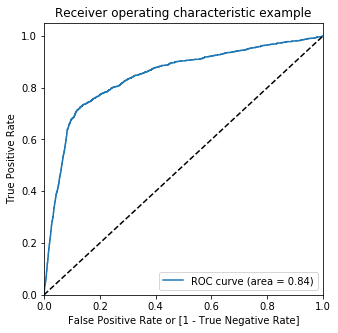

In [200]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### ROC = 0.84, Accuracy = ~90%, But the Recall(Sensitivity) is around ~35% which is very poor, let us find the optimal cut off point to improve the recall as we do not want to lose churn customers

### Finding Optimal Cutoff Point

In [201]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.034322,93413,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.041206,62525,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.008092,55435,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.038223,99579,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.056734,36509,0,1,0,0,0,0,0,0,0,0,0


In [202]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.099775  1.000000  0.000000
0.1   0.1  0.737558  0.809379  0.729598
0.2   0.2  0.867837  0.704019  0.885994
0.3   0.3  0.895667  0.431790  0.947081
0.4   0.4  0.902595  0.189403  0.981640
0.5   0.5  0.900407  0.056638  0.993925
0.6   0.6  0.901076  0.023143  0.998380
0.7   0.7  0.900346  0.006699  0.999393
0.8   0.8  0.900164  0.001827  0.999730
0.9   0.9  0.900164  0.000609  0.999865


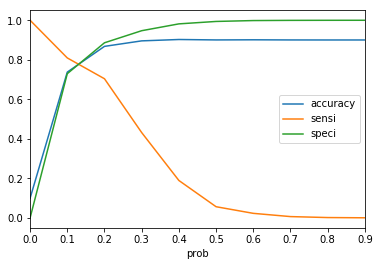

In [203]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take as a cutoff probability, as we see decent accuracy and recall value is ~81%, which means we were able to predict 81% of the churn customers correctly

In [303]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.034322,93413,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.041206,62525,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.008092,55435,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.038223,99579,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.056734,36509,0,1,0,0,0,0,0,0,0,0,0,0


In [205]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7375584857507443

In [206]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[10809,  4006],
       [  313,  1329]], dtype=int64)

In [207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("sensitivity : ", TP / float(TP+FN))

# Let us calculate specificity
print("specificity : ", TN / float(TN+FP))

sensitivity :  0.8093788063337394
specificity :  0.7295983800202498


##  we see decent accuracy of ~74% and recall value of ~81%, which means we were able to predict 81% of the churn customers correctly

## Model 2 : Logistic Regression with Principal Component Analysis

In [208]:
X_train.shape

(16457, 111)

In [209]:
pca = PCA(svd_solver='randomized', random_state=42)

In [210]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components on the first 2 principal components as axes

In [211]:
pca.components_

array([[-5.39359021e-03, -6.54227928e-03, -9.01162440e-03, ...,
        -1.52428400e-01, -1.01176599e-01, -5.47055209e-02],
       [ 8.98406136e-02,  3.61540196e-03,  7.22864187e-03, ...,
         7.25245614e-02,  3.80838364e-02,  4.37150610e-02],
       [-8.71190611e-02, -1.12041001e-03,  1.41700119e-02, ...,
         4.21563492e-02,  4.24254360e-03,  4.36997053e-02],
       ...,
       [ 0.00000000e+00,  5.62837852e-18, -7.28202945e-18, ...,
         5.90280794e-14, -6.32665256e-17, -2.86689088e-17],
       [-0.00000000e+00,  1.63281484e-17,  6.35180224e-17, ...,
        -5.69724983e-14,  1.40678685e-16,  8.81243213e-17],
       [ 0.00000000e+00,  2.64132440e-18, -2.27158752e-18, ...,
         1.21401366e-16,  3.50636671e-17, -1.00521269e-17]])

In [212]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.005394,0.089841,aon
1,-0.006542,0.003615,recharge_6
2,-0.009012,0.007229,recharge_7
3,-0.000483,0.023892,recharge_8
4,-0.198808,0.041975,recharge_data_6


In [213]:
pca.explained_variance_ratio_

array([1.19172590e-01, 8.19127047e-02, 6.41428046e-02, 5.09395444e-02,
       4.05340087e-02, 3.66913149e-02, 3.36769782e-02, 3.05769074e-02,
       2.60843087e-02, 2.36303777e-02, 2.29480381e-02, 2.17094205e-02,
       2.12567295e-02, 1.90274535e-02, 1.79199637e-02, 1.76841745e-02,
       1.71400756e-02, 1.62285811e-02, 1.50223684e-02, 1.47309731e-02,
       1.44172933e-02, 1.24245343e-02, 1.20046935e-02, 1.17868742e-02,
       1.16142879e-02, 1.13650081e-02, 1.09515905e-02, 1.05506923e-02,
       9.67550074e-03, 9.59624665e-03, 9.39783899e-03, 9.25919750e-03,
       8.81880709e-03, 7.91879620e-03, 7.68148058e-03, 7.64214797e-03,
       7.50200211e-03, 7.09999992e-03, 6.98030905e-03, 6.78968535e-03,
       5.90317790e-03, 5.76082726e-03, 5.64210022e-03, 5.46690496e-03,
       5.35904000e-03, 5.20825092e-03, 4.62220748e-03, 4.51800019e-03,
       4.30377210e-03, 4.23089024e-03, 3.79012908e-03, 3.54960695e-03,
       3.42350205e-03, 3.38287981e-03, 3.19055861e-03, 2.99277628e-03,
      

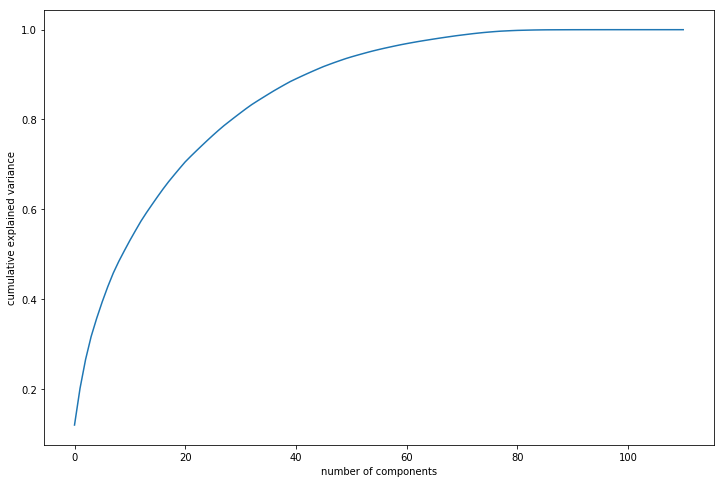

In [214]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 40 components are enough to describe close to 90% of the variance in the dataset
- We'll choose 40 components for our modeling

In [215]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [216]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(16457, 40)

In [217]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())


In [218]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.016406041359566057 , min corr:  -0.02390842300299926


#### there is no correlation between any two components
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [219]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7054, 40)

In [220]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca = LogisticRegression(class_weight='balanced_subsample')

model_pca = learner_pca.fit(df_train_pca,y_train)

In [221]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.79'

#### Let us try with variance cutoff of 90

In [222]:
pca_again = PCA(0.90)

In [223]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(16457, 43)

In [224]:
#training the regression model
learner_pca2 = LogisticRegression(class_weight='balanced_subsample')
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [225]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(7054, 43)

variance of 90 as cutoff chose 59 components

In [226]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.78'

###  Let us just choose 20 PCs and build our model

In [227]:
pca_last = PCA(n_components=20)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(7054, 20)

In [229]:
#training the regression model
learner_pca3 = LogisticRegression(class_weight='balanced_subsample')
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.79'

### 20 PCs , we got auc of 80

### Model 3 : Random Forest Classifier

In [244]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      6387
         1.0       0.00      0.00      0.00       667

    accuracy                           0.91      7054
   macro avg       0.45      0.50      0.48      7054
weighted avg       0.82      0.91      0.86      7054

[[6387    0]
 [ 667    0]]


In [245]:
print(accuracy_score(y_test,predictions))


0.9054437198752481


#### Observation : accuracy(~90%), let's now look at the list of hyperparameters which we can tune to improve model performance.

### Tuning max_depth
Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [246]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",return_train_score=True)

## we come across KeyError: 'mean_train_score' solution for GridSearchCV without parameter return_train_score,
## to fix this set return_train_score=True in gridsearchcv

rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                   

In [247]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.157962,0.088112,0.134674,0.003300,10,{'max_depth': 10},0.674589,0.697080,0.636197,0.669289,0.025136,1,0.926027,0.910420,0.917808,0.918085,0.006375
1,5.884003,0.117586,0.152342,0.001886,15,{'max_depth': 15},0.597806,0.611314,0.553931,0.587684,0.024496,2,0.996347,0.990859,0.992694,0.993300,0.002281
2,6.203355,0.068258,0.162009,0.002450,20,{'max_depth': 20},0.537477,0.563869,0.497258,0.532868,0.027388,3,1.000000,0.999086,0.998174,0.999086,0.000746
3,6.626046,0.336927,0.171343,0.001247,25,{'max_depth': 25},0.515539,0.527372,0.477148,0.506687,0.021438,4,0.999087,1.000000,1.000000,0.999696,0.000431


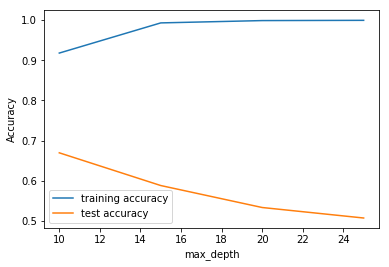

In [248]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [249]:
print('auc score :',rf.best_score_,', best Params :',rf.best_params_)

auc score : 0.6692887993345699 , best Params : {'max_depth': 10}


Test accuracy score almost becomes constant after max_depth=10

### Few common methods for Random forest calculation....

In [250]:
from sklearn.model_selection import cross_val_score
#we need define a common method to plot the training and test accuracy model, insetad of rewrite the same code many times.
# hence the below method does the same...

def plottingtrainingtestAccuracy(score,param):
    scores = score
    # plotting accuracies with param
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\n >>>>>>Model Report getting calculated..........>>>")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

def getModelMetricsData(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # calculate sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    #calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    

def predictChurnWithProbility(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetricsData(y_df.churn,y_df.final_predicted)
    return y_df

def findMostFavourableCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

### Tuning n_estimators

In [251]:
parameters = {'n_estimators': range(50, 150, 25)}
rf = RandomForestClassifier(max_depth=10,class_weight='balanced_subsample',random_state=10)
gridSearchRF = GridSearchCV(rf, parameters, 
                    cv=3, 
                   scoring="recall",return_train_score=True)

gridSearchRF.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                    

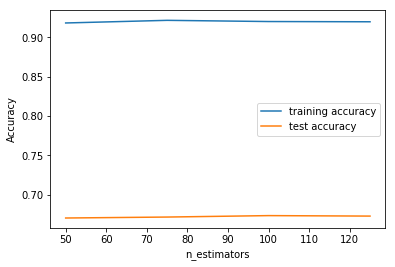

In [252]:
plottingtrainingtestAccuracy(gridSearchRF.cv_results_,'n_estimators')

In [253]:
print('auc score :',gridSearchRF.best_score_,', best Params :',gridSearchRF.best_params_)

auc score : 0.6735556030015525 , best Params : {'n_estimators': 100}


after reaching the value n_estimators = 100, NO changes in the training and testing dataset.

### Tuning max_features

In [254]:
parameters = {'max_features': [50,100,150]}
rf = RandomForestClassifier(max_depth=10,n_estimators=100,class_weight='balanced_subsample',random_state=10)
gridSearchRF = GridSearchCV(rf, parameters, cv=3,scoring="f1",return_train_score=True)
gridSearchRF.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                    

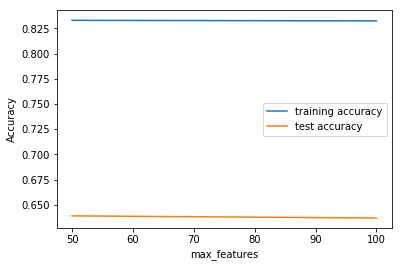

In [255]:
plottingtrainingtestAccuracy(gridSearchRF.cv_results_,'max_features')

In [256]:
print('auc score :',gridSearchRF.best_score_,', best Params :',gridSearchRF.best_params_)

auc score : 0.6391613706558218 , best Params : {'max_features': 50}


### Tuning min_sample_leaf

In [257]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf = RandomForestClassifier(max_depth=10,n_estimators=100,max_features=50,class_weight='balanced_subsample',random_state=10)
gridSearchRF = GridSearchCV(rf, parameters, cv=3,scoring="f1",return_train_score=True)

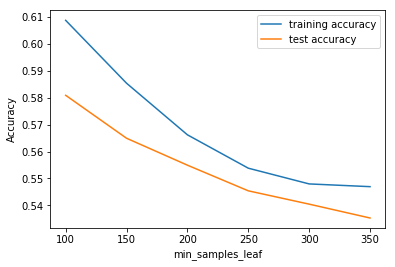

In [258]:
gridSearchRF.fit(X_train, y_train)
plottingtrainingtestAccuracy(gridSearchRF.cv_results_,'min_samples_leaf')

In [259]:
print('auc score :',gridSearchRF.best_score_,', best Params :',gridSearchRF.best_params_)

auc score : 0.5808820724319071 , best Params : {'min_samples_leaf': 100}


### Fitting the final model with the best hyper parameters obtained from above grid search.

In [273]:
rf_final = RandomForestClassifier(max_depth=10,
                                  n_estimators=100,
                                  max_features=50,
                                  min_samples_leaf=100,class_weight='balanced_subsample',                                 
                                  random_state=10)

In [274]:
print(">>>>>>>>>>>>>>> Calculating the Model performance on Training data set...>>>>>>>>>>>>>>>>>>>>>>")
modelfit(rf_final,X_train,y_train)

>>>>>>>>>>>>>>> Calculating the Model performance on Training data set...>>>>>>>>>>>>>>>>>>>>>>

 >>>>>>Model Report getting calculated..........>>>
Accuracy : 0.8714
Recall/Sensitivity : 0.8441
AUC Score (Train): 0.948225
CV Score : Mean - 0.9213024 | Std - 0.008857596 | Min - 0.9125845 | Max - 0.9379931


In [277]:
from sklearn.model_selection import cross_val_score
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\n >>>>>>Model Report getting calculated..........>>>")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

def getModelMetricsData(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # calculate sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    #calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    

def predictChurnWithProbility(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetricsData(y_df.churn,y_df.final_predicted)
    return y_df

def findMostFavourableCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [278]:
# predicting churn with cut-off 0.1
cut_off_prob=0.1
y_train_df = predictChurnWithProbility(rf_final,X_train,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.7298983237435477
Sensitivity/Recall : 0.9969549330085262
Specificity: 0.46284171447856903
False Positive Rate: 0.537158285521431
Positive predictive value: 0.17060969254820219
Negative Predictive value: 0.9992713494607987
sklearn precision score value: 0.17060969254820219


,churn,churn_Prob,final_predicted
index1,,,
93413,0.0,0.186110,1
62525,0.0,0.099030,0
55435,0.0,0.692188,1
99579,0.0,0.138833,1
36509,0.0,0.128636,1


     prob  accuracy     sensi     speci
0.0   0.0  0.099775  1.000000  0.000000
0.1   0.1  0.516133  0.996955  0.462842
0.2   0.2  0.706629  0.976857  0.676679
0.3   0.3  0.798201  0.943971  0.782045
0.4   0.4  0.858297  0.905603  0.853054
0.5   0.5  0.893298  0.844093  0.898751
0.6   0.6  0.914140  0.781973  0.928788
0.7   0.7  0.925077  0.704629  0.949511
0.8   0.8  0.934861  0.619367  0.969828
0.9   0.9  0.932005  0.449452  0.985488


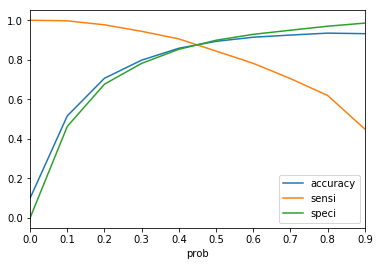

In [279]:
# finding cut-off with the right balance of the metrices
findMostFavourableCutoff(y_train_df)

In [280]:
cut_off_prob=0.5
predictChurnWithProbility(rf_final,X_train,y_train,cut_off_prob)

Roc_auc_score : 0.8714219178228604
Sensitivity/Recall : 0.8440925700365408
Specificity: 0.8987512656091798
False Positive Rate: 0.10124873439082012
Positive predictive value: 0.4802494802494803
Negative Predictive value: 0.9811362464077813
sklearn precision score value: 0.4802494802494803


,churn,churn_Prob,final_predicted
index1,,,
93413,0.0,0.186110,0
62525,0.0,0.099030,0
55435,0.0,0.692188,1
99579,0.0,0.138833,0
36509,0.0,0.128636,0
44335,0.0,0.054244,0
74820,0.0,0.853850,1
43445,0.0,0.144973,0
74479,0.0,0.159631,0


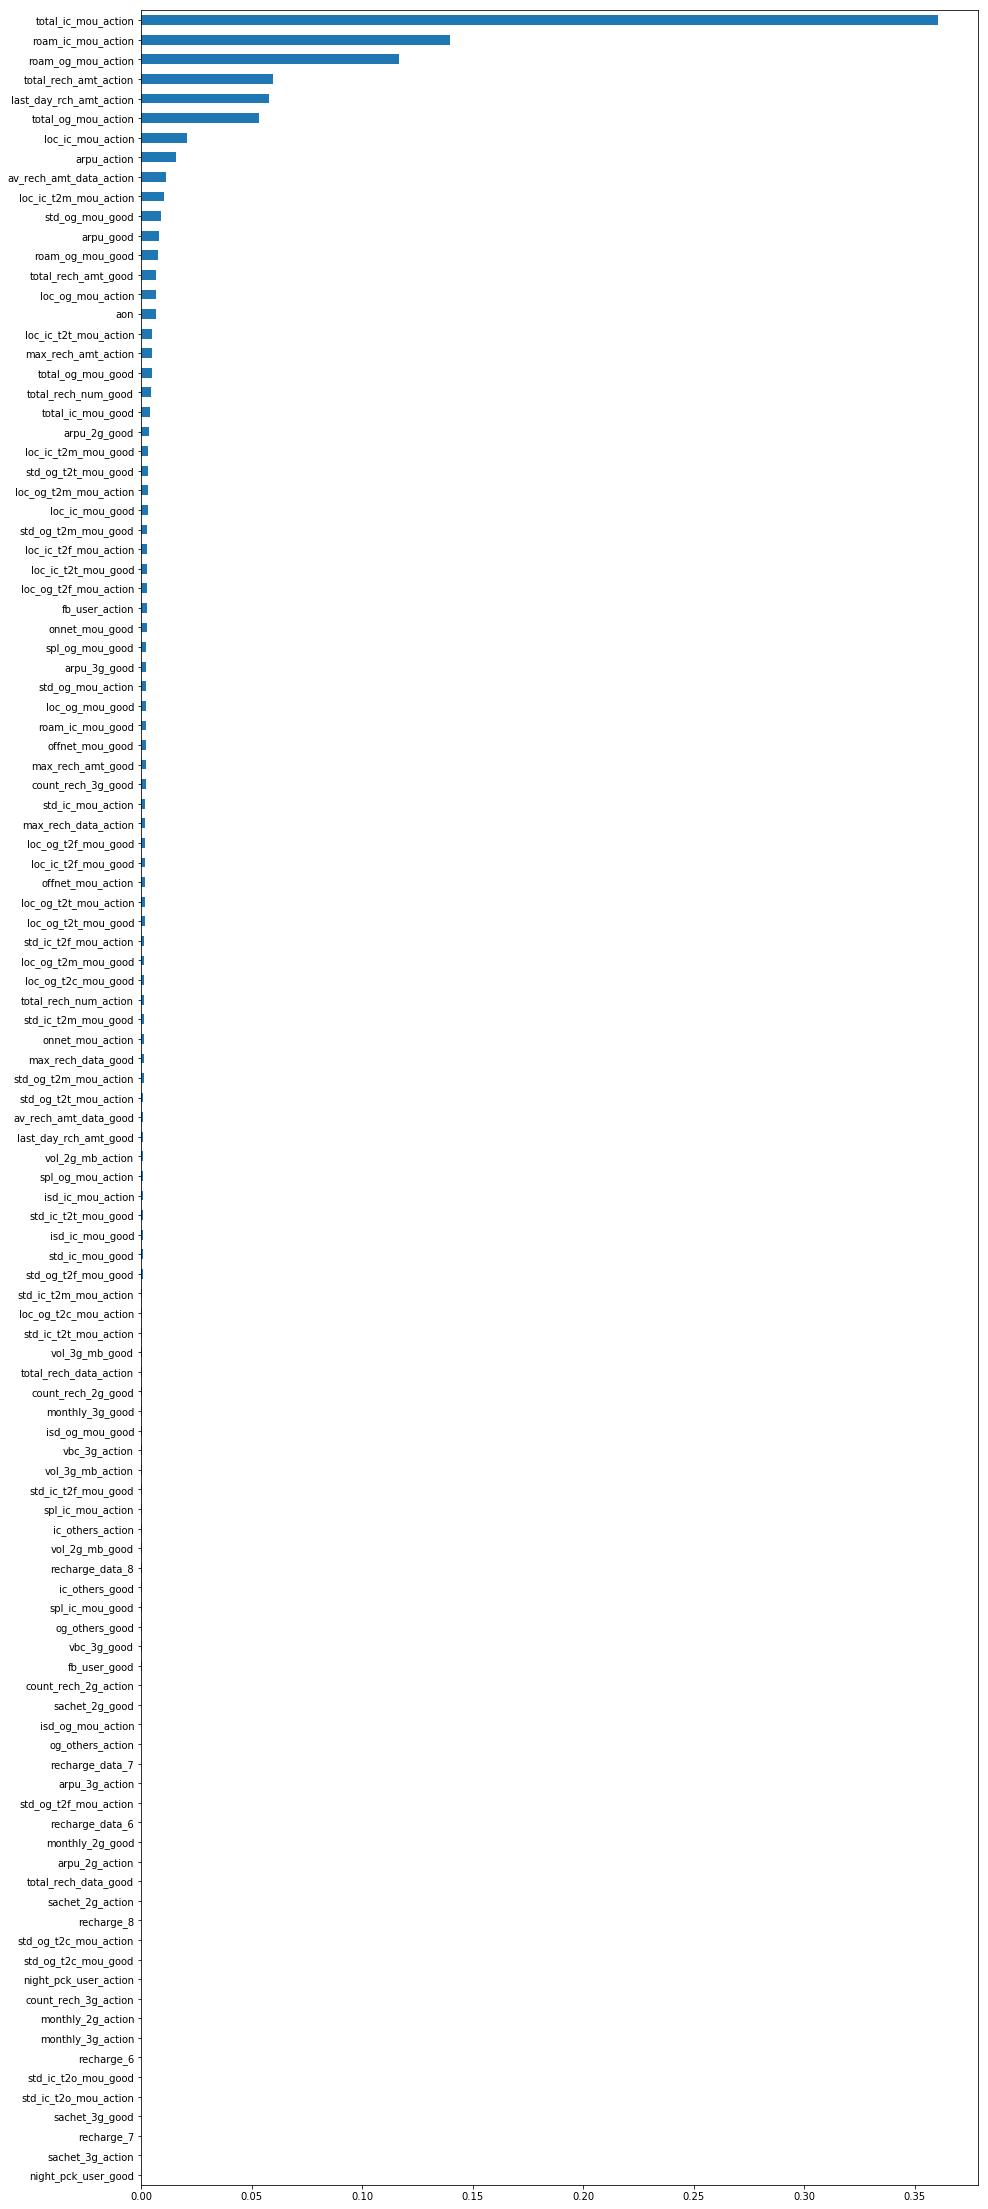

In [284]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


rf = RandomForestClassifier(max_depth=10,
                                  n_estimators=100,
                                  max_features=50,
                                  min_samples_leaf=100,class_weight='balanced_subsample',                                 
                                  random_state=10)

rf.fit(X_train, y_train)
X.index.values
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

### Observation:
    
The graph above suggest that most of the top 30 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8(August) i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers.


## Model 4 : Random Forest with AdaBoost

In [285]:
#basic model for AdaBoostClassifier
rf_model = RandomForestClassifier(bootstrap=True,max_depth=1,class_weight="balanced_subsample")

In [286]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2,3,4],
              "n_estimators": [100, 200, 300]
             }

In [287]:
ABC = AdaBoostClassifier(
    base_estimator=rf_model,
    learning_rate=0.6,
    algorithm="SAMME")

In [288]:
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [289]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 17.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                class_weight='balanced_subsample',
                                                                                criterion='gini',
                                                                                max_depth=1,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                                                                                min_impurity_decrease=0.0,

In [290]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.010087,6.270138,0.566366,0.207910,2,100,"{'base_estimator__max_depth': 2, 'n_estimators...",0.907261,0.882189,0.904359,0.897936,0.011198,9,0.943430,0.889725,0.944582,0.925913,0.025593
1,27.676250,0.898308,0.748709,0.073336,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.911893,0.915721,0.904375,0.910663,0.004713,3,0.940437,0.936990,0.936089,0.937839,0.001874
2,20.485505,3.587831,0.555698,0.180706,2,300,"{'base_estimator__max_depth': 2, 'n_estimators...",0.909430,0.906799,0.896900,0.904376,0.005395,8,0.920760,0.908626,0.924442,0.917943,0.006757
3,32.602865,6.467467,0.951721,0.289356,3,100,"{'base_estimator__max_depth': 3, 'n_estimators...",0.911132,0.915645,0.902837,0.909871,0.005304,4,0.943470,0.965011,0.949626,0.952702,0.009059
4,31.639810,9.753888,0.843382,0.139010,3,200,"{'base_estimator__max_depth': 3, 'n_estimators...",0.908254,0.917274,0.906937,0.910822,0.004594,2,0.941670,0.945771,0.968212,0.951884,0.011666
5,21.505563,1.297966,0.415357,0.036383,3,300,"{'base_estimator__max_depth': 3, 'n_estimators...",0.911304,0.921623,0.903395,0.912107,0.007463,1,0.935778,0.948930,0.952142,0.945617,0.007079
6,52.027309,22.913094,1.263072,0.394749,4,100,"{'base_estimator__max_depth': 4, 'n_estimators...",0.911495,0.910641,0.905252,0.909129,0.002764,5,0.995604,0.950265,0.998334,0.981401,0.022044
7,66.917494,35.770771,2.011448,1.505162,4,200,"{'base_estimator__max_depth': 4, 'n_estimators...",0.912282,0.917075,0.895237,0.908198,0.009371,6,0.983825,0.964111,0.995136,0.981024,0.012820
8,51.614285,23.782262,1.314409,1.023985,4,300,"{'base_estimator__max_depth': 4, 'n_estimators...",0.908788,0.908926,0.901172,0.906295,0.003623,7,0.972445,0.962591,0.994508,0.976515,0.013344


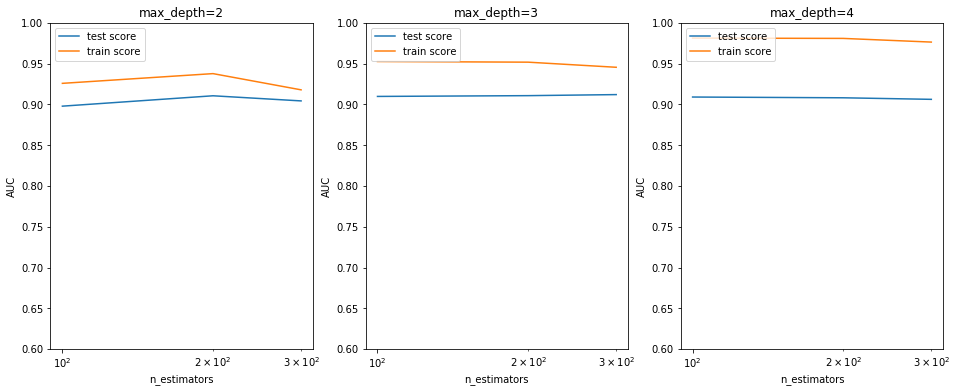

In [291]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [292]:
print('auc score :',grid_search_ABC.best_score_,', best Params :',grid_search_ABC.best_params_)

auc score : 0.9121071477103767 , best Params : {'base_estimator__max_depth': 3, 'n_estimators': 300}


### Build Model Random Forest model with AdaBoost considering the optimal values

In [293]:
rf_model = RandomForestClassifier(bootstrap=True,max_depth=3,class_weight="balanced_subsample")

In [294]:
ABC = AdaBoostClassifier(
    base_estimator=rf_model,
    learning_rate=0.6,
    n_estimators= 300,
    algorithm="SAMME")
ABC.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced_subsample',
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                            

In [295]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]

array([[0.57783182, 0.42216818],
       [0.67382166, 0.32617834],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.69886528, 0.30113472],
       [0.73105858, 0.26894142],
       [0.69886528, 0.30113472],
       [0.73105858, 0.26894142],
       [0.64097343, 0.35902657],
       [0.73105858, 0.26894142]])

In [296]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.8262339004288368

In [297]:
print(classification_report(y_train,ABC.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93     14815
         1.0       0.46      0.84      0.59      1642

    accuracy                           0.89     16457
   macro avg       0.72      0.86      0.76     16457
weighted avg       0.93      0.89      0.90     16457



In [298]:
print(classification_report(y_test,ABC.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      6387
         1.0       0.54      0.51      0.53       667

    accuracy                           0.91      7054
   macro avg       0.75      0.73      0.74      7054
weighted avg       0.91      0.91      0.91      7054



#### Observation:
 - RandomForest model with AdaBoost gives an overall accuracy of 89%on train data and 91% on test data.
 - Recall 84% on Train data and 51% on Test data

## Conclusion:

### Model 1 : Logistic Regression with RFE
####  we see decent accuracy of ~74% and recall value of ~81%, which means we were able to predict 81% of the churn customers correctly
##### Below are predictor variables finalised after running model 1, checking VIF(multicollinearity), from this we can understand that  the most important predictors are from action month
- std_og_t2t_mou_action,
- offnet_mou_good
- onnet_mou_good,
- std_og_t2m_mou_action
- total_rech_amt_action
- loc_ic_t2m_mou_action
- loc_ic_t2t_mou_action
- std_ic_mou_action
- isd_ic_mou_action	

### Model 2 : Logistic Regression with PCA
- 40 PCA components were enough to describe close to 90% of the variance in the dataset,with this we were able to achieve auc of ~0.8


### Model 3: Random Forest with tuned hyper parameters
- Top 30 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8(August) i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers.

### Model 4: Random Forest with AdaBoost
 - RandomForest model with AdaBoost gives an overall accuracy of 89% on train data and 91% on test data.
 - Recall 84% on Train data and 51% on Test data
 
#### Recommendations:
- FB users usually recharge data packs, the telecom operator can give good offers on data packs to new customers who use facebook
- Night pack users are usually not data users,the telecom operator can give good offers on talktime
- arpu is quite less, which indicates that most are prepaid users
- people dont use loc_og_t2o_mou,std_og_t2o_mou, the telecom operator need to look into whether to continue this service or not or introduce new offers on this service.
- people who have stayed on the network for longer time have less churn rate, More number of customers stay for longer duration in the network,people who churn are relatively newer customers, the telecom operator can give attractive data packs and talktime offers to the new customers
- From model 1 and 3, we have observed that IC(incoming calls) and OG(out going call) during action phase are very important factors,the telecom operator can keep a track on these parameters to retain the customer.

